# Kapittel 8

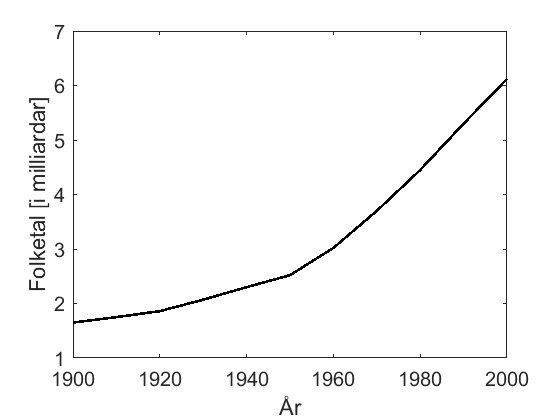

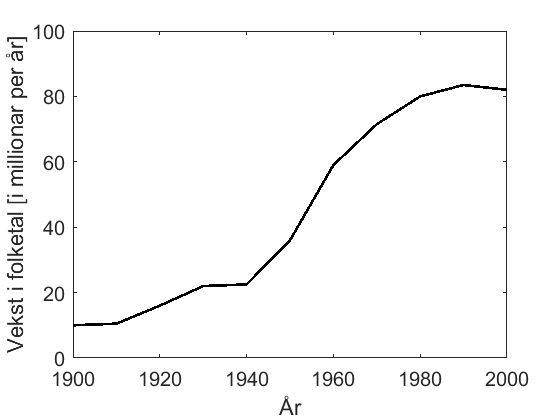

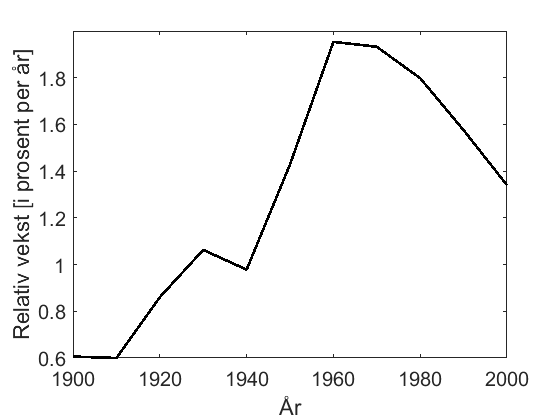

In [1]:
% Folkevekst.m

% Skript som lagar plott av folkeveksten på 1900-talet

% Gir vektorar med år og folketal (i milliardar):
h=10;
Aar=1900:h:2000;
Folk=[1.65 1.75 1.86 2.07 2.30 2.52 3.02 3.70 4.45 5.30 6.12];

% Plottar folketal
figure(1)
plot(Aar,Folk,'k-','linewidth',2)
set(gca,'fontsize',15)
xlabel('År')
ylabel('Folketal [i milliardar]')

% Reknar ut dei deriverte
% For år 1900
FolkDeriv(1)=(Folk(2)-Folk(1))/h;
% For åra 1910-1990
for n=2:10
  FolkDeriv(n)=(Folk(n+1)-Folk(n-1))/(2*h);
end
% For år 2000
FolkDeriv(11)=(Folk(11)-Folk(10))/h;

% Plottar vekstfarten
figure(2)
% Reknar om til millionar/år
plot(Aar,FolkDeriv*1e3,'k-','linewidth',2)
set(gca,'fontsize',15)
xlabel('År')
ylabel('Vekst i folketal [i millionar per år]')

% Plottar relativ vekstfart
figure(3)
plot(Aar,FolkDeriv./Folk*100,'k-','linewidth',2)
set(gca,'fontsize',15)
xlabel('År')
ylabel('Relativ vekst [i prosent per år]')


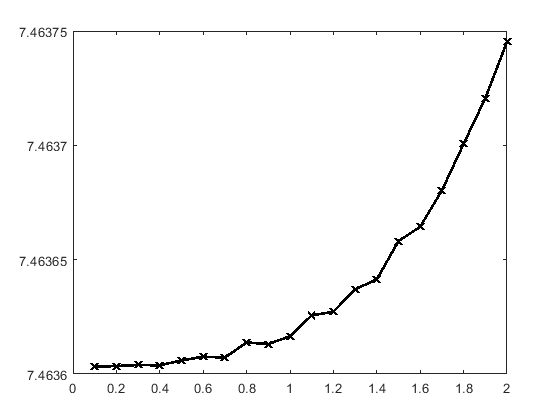

In [8]:
% GammaVsExp.m

% Skript som bestemmer skjæringspunktet mellom
% eksponentialfunksjonen og gammafunksjonen.
% Til det brukar vi Newtons metode og numerisk derivasjon.
% Skriptet plottar konvergensen av svaret mot h-verdien
% som blir brukt i derivasjonen.

% Gir presisjon og h-verdiane
Pres=1e-5;
hVektor=[2:-.1:.1];
% Startverdi
x0=8;

indeks=1;
% Bestemmer x ved Newtons metode for kvar av h-verdiane
for h=hVektor
  x=x0;
  xGml=10;
  while abs(x-xGml)>Pres
    xGml=x;
    % Den deriverte av gamma
    Derivert=(gamma(x+h)-gamma(x-h))/(2*h);
    % Iterasjonsformel (Newtons metode)
    x=x-(gamma(x)-exp(x))/(Derivert-exp(x));
  end
  Svar(indeks)=x;
  indeks=indeks+1;
end

% Plottar løysingane som funksjon av h
plot(hVektor,Svar,'kx-','linewidth',2)


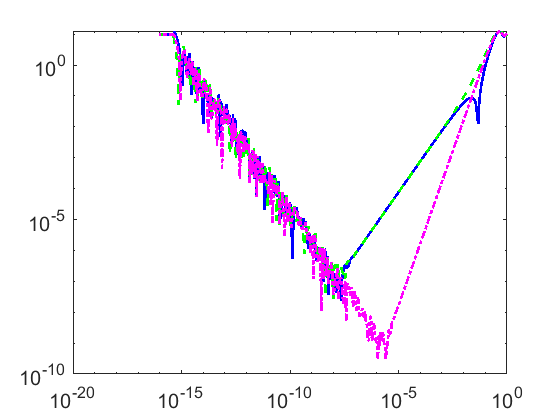

In [3]:
% PlottFeilenDeriv.m

% Skript som plottar feilen i ulike estimat for
% den deriverte.
% Plottet blir laga med logaritmiske aksar.

% Funksjonen som skal deriverast
f=@(x) sin(x.^2);
% Den deriverte
fD=@(x) 2*x.*cos(x.^2);

% Argument-verdi
a=5;

% Eksakt svar
Derivert=fD(a);

% Vektor med ulike steglengder
%h=10.^[0:-1:-17];               % Grov oppdeling
h=.9.^[0:350];                   % Fin oppdeling

% Tre estimat: framover-, bakover- og midtpunktsformel
FramFormel=abs((f(a+h)-f(a))./h-Derivert);
BakFormel=abs((f(a)-f(a-h))./h-Derivert);
MidtFormel=abs((f(a+h)-f(a-h))./(2*h)-Derivert);

% Plottar feilen med logaritmiske aksar
loglog(h,FramFormel,'b-','linewidth',2)
hold on
loglog(h,BakFormel,'g--','linewidth',2)
loglog(h,MidtFormel,'m-.','linewidth',2)
hold off
set(gca,'fontsize',15)
set(gcf,'paperpositionmode','auto')